This code runs three examples using the Disloc2D function: 
1. Surface deformation due to slip on a fault at depth.
2. Plot of displacement vectors due to slip on a fault.
3. Fold formed by repeated slip on a fault.

In [1]:
# Import libraries
import numpy as np
from matplotlib import pyplot as plt

# Import function Disloc2D
import sys, os
sys.path.append(os.path.abspath('../functions'))
from Disloc2D import Disloc2D

We will use the same fault geometry, which we define here, for all three examples.
(xt,yt) and (xb,yb) are the fault tip and base coordinates, respectively. slip is slip on the fault.
The units of length are meters, and down is negative in the y coordinate.

In [2]:
#Define the fault:
dip = 30.0*np.pi/180.0 #Fault dip in radians.
xt = 0.0
yt = -500.0
yb = -1500.0
xb = xt-(yt-yb)/np.tan(dip)
tip = (xt,yt)
base = (xb,yb)
nu = 0.25 #Poisson's ratio.
slip = 2.0 #Positive for reverse, negative for normal.

#### Example 1: Surface Deformation.
This example models deformation at the surface of the Earth due to slip on a 
fault, such as might be observed after an earthquake.

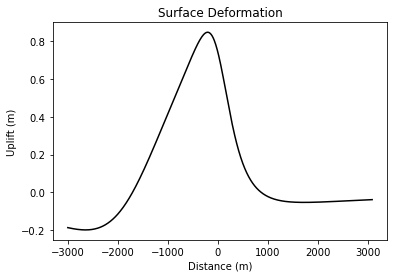

In [3]:
#Define the observation points at the surface.
obsx1 = np.arange(-3000.0,3100.0,10.0,dtype=float)
obsy1 = np.zeros(obsx1.shape)

#Apply slip and deform the surface.
ux,uy = Disloc2D(tip,base,slip,nu,obsx1,obsy1)
obsx1 = obsx1+ux
obsy1 = obsy1+uy

#Plot the result.
plt.figure()
plt.plot(obsx1,obsy1,'k-')
plt.xlabel('Distance (m)')
plt.ylabel('Uplift (m)')
plt.title('Surface Deformation');

#### Example 2: Displacement Vectors
This example shows the displacements that occur at depth within the half-space 
due to slip on the fault.

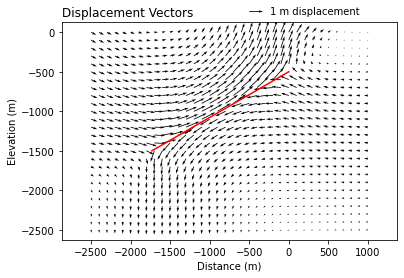

In [4]:
#Define the observation points in a 2D region surrounding the fault.
obsx2, obsy2 = np.meshgrid(np.arange(-2500.0,1100.0,100.0,dtype=float),
                         np.arange(-2500.0,100.0,100.0,dtype=float))

#Ignore divide by zero error for point right at fault tip.
np.seterr(divide='ignore', invalid='ignore') 
#Apply slip and calculate displacement vectors.
ux,uy = Disloc2D(tip,base,slip,nu,obsx2,obsy2)

#Plot the result.
fig, ax = plt.subplots()
ax.plot([xt,xb],[yt,yb],'r-') #Plot the fault
q = ax.quiver(obsx2, obsy2, ux, uy)
ax.quiverkey(q, X=0.6, Y=1.05, U=1, label='1 m displacement', labelpos='E')
ax.set_xlabel('Distance (m)')
ax.set_ylabel('Elevation (m)')
ax.set_title('Displacement Vectors',loc='left')
ax.axis('equal')
plt.show();

#### Example 3: Fold Growth
This example shows how repeated slip on the fault can cause growth 
of a fold above the fault tip.

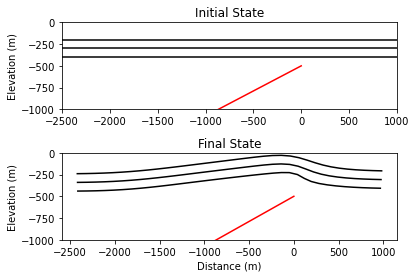

In [5]:
#Define the observation points as initially horizontal beds.
obsx3, obsy3 = np.meshgrid(np.arange(-2500.0,1100.0,100.0,dtype=float),
                         [-400.0,-300.0,-200.0])

#Plot the initial state:
fig, axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=0.5)
axs[0].plot([xt,xb],[yt,yb],'r-') #Plot the fault
for i in range(obsx3.shape[0]):
    axs[0].plot(obsx3[i,:],obsy3[i,:],'k-')
axs[0].set_ylabel('Elevation (m)')
axs[0].set_title('Initial State')
axs[0].set_xlim(-2500,1000)
axs[0].set_ylim(-1000,0)

#Apply repeated slip increments and displace the observation points.
n_inc = 200 #Total number of increments.
for i in range(n_inc):
    ux,uy = Disloc2D(tip,base,slip,nu,obsx3,obsy3)
    obsx3 = obsx3+ux
    obsy3 = obsy3+uy
    
#Plot the final state:
axs[1].plot([xt,xb],[yt,yb],'r-') #Plot the fault
for i in range(obsx3.shape[0]):
    axs[1].plot(obsx3[i,:],obsy3[i,:],'k-')
axs[1].set_xlabel('Distance (m)')
axs[1].set_ylabel('Elevation (m)')
axs[1].set_title('Final State')
axs[0].set_xlim(-2500,1000)
axs[1].set_ylim(-1000,0)
plt.show();

Try a normal fault dipping 60 degrees.